<a href="https://colab.research.google.com/github/Basel-byte/Speech-Emotion-Recognition/blob/L_trial/Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import f1_score, confusion_matrix

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['SAD', 'ANG', 'HAP', 'SAD', 'FEA', 'NEU', 'HAP', 'DIS', 'FEA', 'SAD', 'FEA', 'DIS', 'HAP', 'ANG', 'NEU', 'FEA', 'SAD', 'FEA', 'HAP', 'NEU', 'HAP', 'NEU', 'SAD', 'NEU', 'DIS', 'DIS', 'SAD', 'HAP', 'SAD', 'ANG', 'SAD', 'NEU', 'DIS', 'FEA', 'HAP', 'HAP', 'DIS', 'SAD', 'ANG', 'SAD', 'ANG', 'FEA', 'HAP', 'SAD', 'DIS', 'SAD', 'ANG', 'HAP', 'ANG', 'NEU', 'FEA', 'HAP', 'DIS', 'FEA', 'SAD', 'FEA', 'FEA', 'NEU', 'HAP', 'ANG', 'ANG', 'FEA', 'DIS', 'ANG', 'DIS', 'ANG', 'FEA', 'ANG', 'DIS', 'ANG', 'DIS', 'HAP', 'SAD', 'ANG', 'ANG', 'DIS', 'DIS', 'HAP', 'HAP', 'ANG', 'DIS', 'ANG', 'NEU', 'NEU', 'NEU', 'HAP', 'HAP', 'FEA', 'SAD', 'HAP', 'DIS', 'SAD', 'FEA', 'SAD', 'SAD', 'HAP', 'HAP', 'HAP', 'SAD', 'FEA', 'ANG', 'ANG', 'DIS', 'HAP', 'FEA', 'HAP', 'HAP', 'NEU', 'NEU', 'SAD', 'SAD', 'DIS', 'HAP', 'ANG', 'SAD', 'SAD', 'DIS', 'NEU', 'ANG', 'DIS', 'HAP', 'FEA', 'NEU', 'ANG', 'H

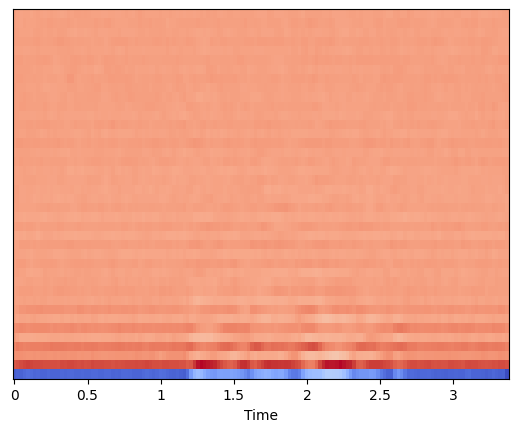

------ (128, 146)
------ (128, 146)


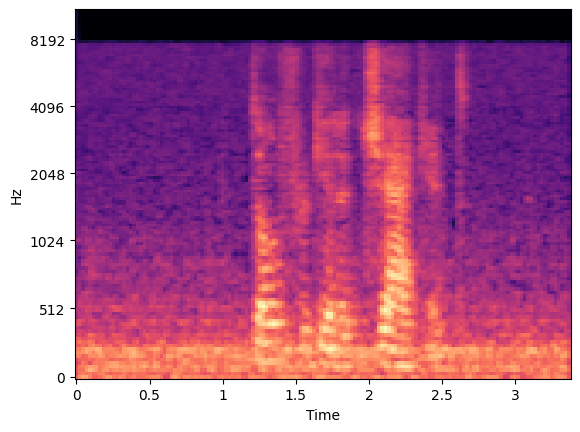

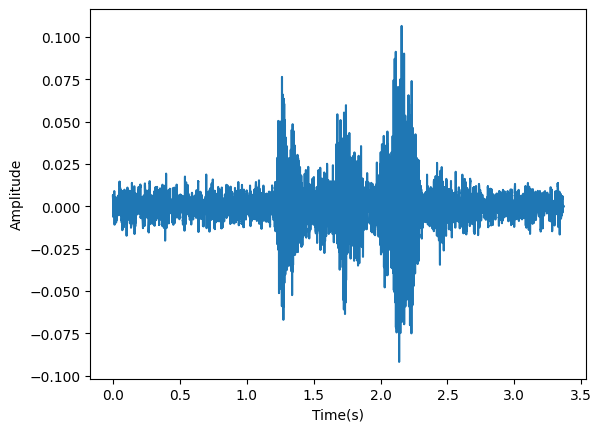

(74309,)
22050


In [ ]:
%run "Data_Preprocessing.ipynb"

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(8400, 1)))
model.add(MaxPooling1D(pool_size=8))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(8400, 1)))
model.add(MaxPooling1D(pool_size=8))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(8400, 1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(8400, 1)))
model.add(MaxPooling1D(pool_size=4))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(8400, 1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8398, 32)          128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1049, 32)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1047, 32)          3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 130, 32)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 128, 32)           3104      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 64, 32)           0

In [ ]:
history=model.fit(train_data, train_labels, batch_size=64, epochs=25, validation_data=(valid_data, valid_labels))

Epoch 1/25
78/78 [==============================] - 31s 395ms/step - loss: 0.7674 - accuracy: 0.7097 - val_loss: 1.4743 - val_accuracy: 0.5057
Epoch 2/25
78/78 [==============================] - 35s 455ms/step - loss: 0.7330 - accuracy: 0.7223 - val_loss: 1.6388 - val_accuracy: 0.4521
Epoch 3/25
78/78 [==============================] - 33s 422ms/step - loss: 0.7235 - accuracy: 0.7263 - val_loss: 1.5091 - val_accuracy: 0.4866
Epoch 4/25
78/78 [==============================] - 33s 415ms/step - loss: 0.6929 - accuracy: 0.7407 - val_loss: 1.5092 - val_accuracy: 0.4828
Epoch 5/25
78/78 [==============================] - 31s 405ms/step - loss: 0.6651 - accuracy: 0.7514 - val_loss: 1.5642 - val_accuracy: 0.4866
Epoch 6/25
78/78 [==============================] - 31s 399ms/step - loss: 0.6361 - accuracy: 0.7605 - val_loss: 1.6350 - val_accuracy: 0.5019
Epoch 7/25
78/78 [==============================] - 31s 396ms/step - loss: 0.6326 - accuracy: 0.7629 - val_loss: 1.6928 - val_accuracy: 0.4751

KeyboardInterrupt: ignored

In [ ]:
loaded_model = load_model('my_model.h5')
test_loss, test_acc = loaded_model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

70/70 [==============================] - 5s 65ms/step - loss: 1.5613 - accuracy: 0.4935
Test accuracy: 0.4935064911842346


In [ ]:
loaded_model = load_model('my_model.h5')
test_loss, test_acc = loaded_model.evaluate(valid_data, valid_labels)
print('validation accuracy:', test_acc)

9/9 [==============================] - 1s 40ms/step - loss: 1.4608 - accuracy: 0.5402
validation accuracy: 0.540229856967926


In [ ]:
loaded_model = load_model('my_model.h5')
test_loss, test_acc = loaded_model.evaluate(train_data, train_labels)
print('Train accuracy:', test_acc)

155/155 [==============================] - 9s 57ms/step - loss: 0.5824 - accuracy: 0.7835
Train accuracy: 0.7835051417350769


In [ ]:
def plot(confusion_matrix, class_labels):
  fig, ax = plt.subplots()
  im = ax.imshow(cm)
  # Add the colorbar
  cbar = ax.figure.colorbar(im, ax=ax)

  # Set the tick labels and axis labels
  ax.set_xticks(np.arange(len(class_labels)))
  ax.set_yticks(np.arange(len(class_labels)))
  ax.set_xticklabels(class_labels)
  ax.set_yticklabels(class_labels)

  # Rotate the tick labels and set their alignment
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")

  # Loop over data dimensions and create text annotations
  for i in range(len(class_labels)):
      for j in range(len(class_labels)):
          text = ax.text(j, i, confusion_matrix[i, j],
                        ha="center", va="center", color="w")

  # Set the plot title
  ax.set_title("Confusion Matrix")

  # Show the plot
  plt.show()

70/70 [==============================] - 5s 74ms/step
F measure:
0.4944962748395815

CofusioN Matrix:


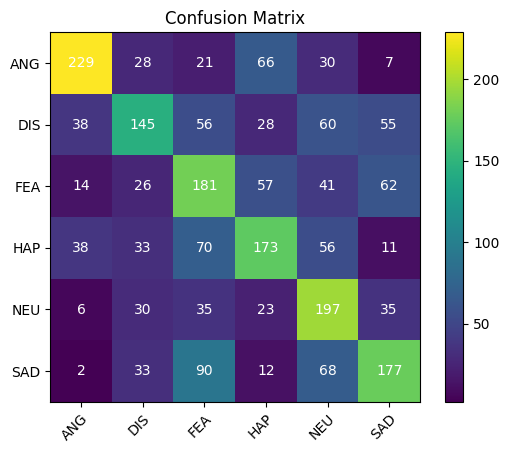


Most Confusing Classes:
class: SAD and class: FEA with 90
class: HAP and class: FEA with 70
class: SAD and class: NEU with 68
class: ANG and class: HAP with 66
class: FEA and class: SAD with 62


In [ ]:
# Compute predictions on the test set
loaded_model = load_model('my_model.h5')
y_pred = loaded_model.predict(test_data)
y_pred_decrypted = np.argmax(y_pred, axis=1)
test_labels_decrypted = np.argmax(test_labels, axis=1)
labels_decrypted = lb.classes_

f1 = f1_score(test_labels_decrypted, y_pred_decrypted, average='weighted')
print("F measure:\n============")
print(f1)
print()

print("CofusioN Matrix:\n=================")
N = 5
cm = confusion_matrix(test_labels_decrypted, y_pred_decrypted)
plot(cm, labels_decrypted)
print("\nMost Confusing Classes:\n===============")
cm = np.array(cm)
np.fill_diagonal(cm, 0)
cm_f = cm.flatten()
cm_f = np.flip(cm_f.argsort()[-N:])
for n in cm_f:
  print(f'class: {labels_decrypted[int(n / cm.shape[0])]} and class: {labels_decrypted[n % cm.shape[0]]} with {cm[int(n / cm.shape[0]), n % cm.shape[0]]}')
